In [253]:
import cv2
import os
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np
from skimage import color
from skimage import io
import pandas as pd
from PIL import Image
import collections

In [15]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [235]:
def to_index(name):
    return int(name[:6])

In [236]:
def to_name(index):
    name = ''
    for i in range(6 - len(str(index))):
        name += '0'
    name = name + str(index) + '.jpg'
    return name

In [241]:
def load_images_from_folder(folder):
    images = {}
    sizes = {}
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder,filename))
        if img is not None: 
            sizes[to_index(filename)] = img.size  
            new_img = img.resize((512,512), Image.ANTIALIAS)
            temp = rgb2gray(np.array(new_img))
            images[to_index(filename)] = temp   
    return images, sizes

In [234]:
def change_bbox(name, old_w, old_h, df):
    df.at[to_index(name)-1, 'x_1'] *= (512/old_w)
    df.at[to_index(name)-1, 'y_1'] *= (512/old_h)
    df.at[to_index(name)-1, 'width'] *= (512/old_w)
    df.at[to_index(name)-1, 'height'] *= (512/old_h)

In [242]:
folder_name = './test/'
train_imgs, old_sizes= load_images_from_folder(folder_name)

In [254]:
od = collections.OrderedDict(sorted(train_imgs.items())) #ordered dict

In [249]:
df = pd.read_csv('./587947_1060492_bundle_archive/list_bbox_celeba.csv')

In [251]:
img_number = 1
change_bbox(to_name(img_number), old_sizes[img_number][0], old_sizes[img_number][1], df)

In [237]:
def print_img(name):
    x = df.at[to_index(name)-1, 'x_1']
    y = df.at[to_index(name)-1, 'y_1']
    w = df.at[to_index(name)-1, 'width']
    h = df.at[to_index(name)-1, 'height']
    
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(train_imgs[to_index(name)])

    # Create a Rectangle patch
    rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    plt.show()

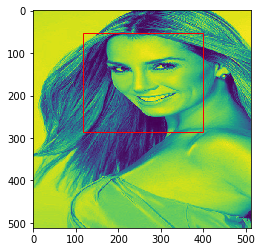

In [228]:
print_img('000001.jpg')